1. IMPORT LIBRARIES

In [54]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

2. LOAD AND EXPLORE THE DATASET

In [55]:
# load dataset
df =pd.read_csv(r'C:\Users\mac\OneDrive\Desktop\Future_Internship\titanic_dataset\train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:
# Check for unique values
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [58]:
# Check for duplicate values
df.duplicated().sum()

0

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

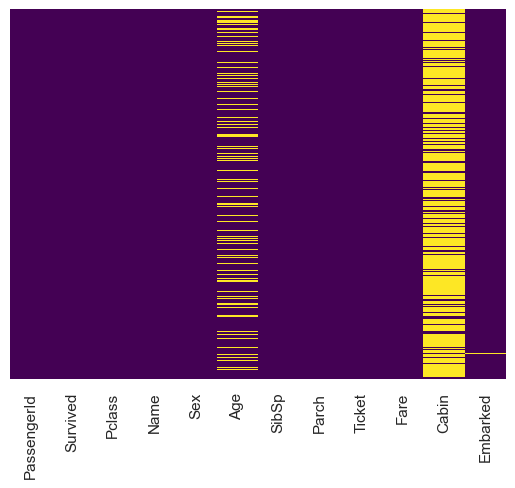

In [59]:
# Check for missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

df.isnull().sum()

TypeError: Axes.boxplot() got an unexpected keyword argument 'pallette'

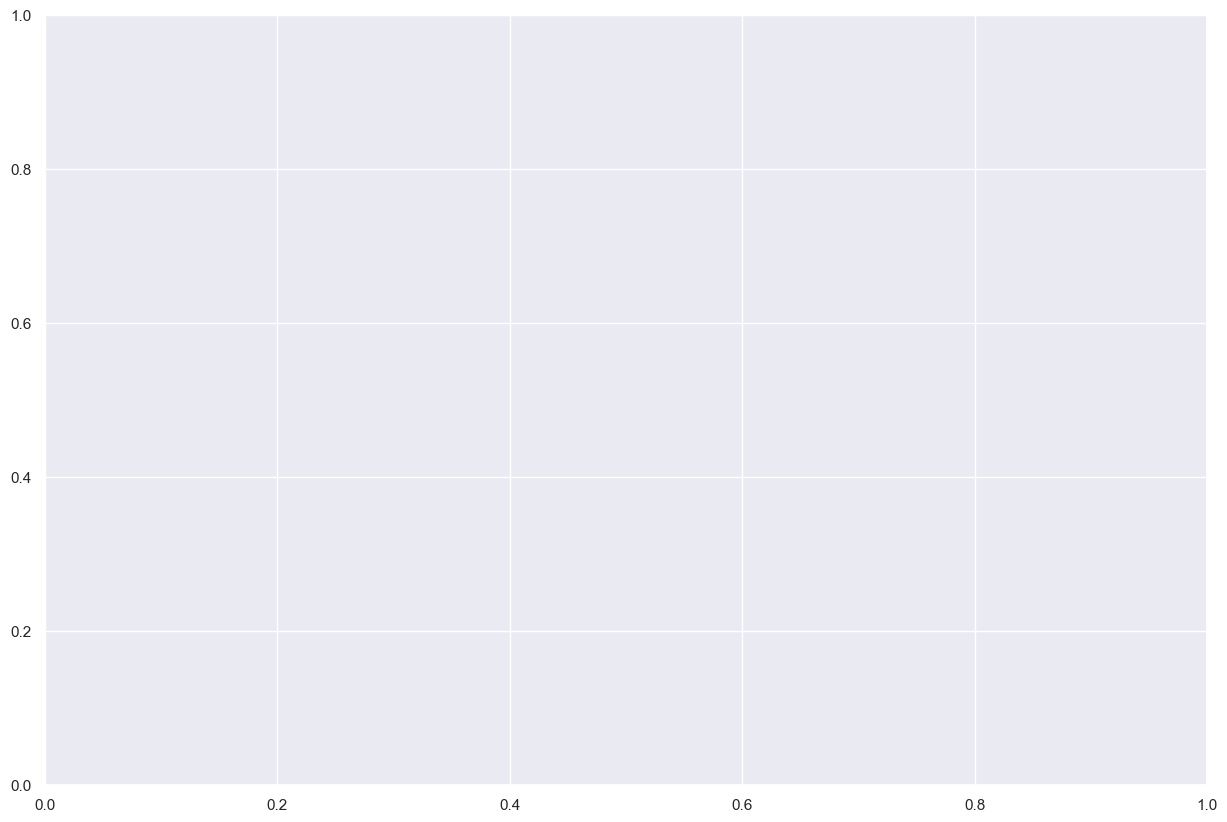

In [92]:
# Check for outliers
# 
df.boxplot(figsize=(15,10))
plt.show()

<Axes: ylabel='Age'>

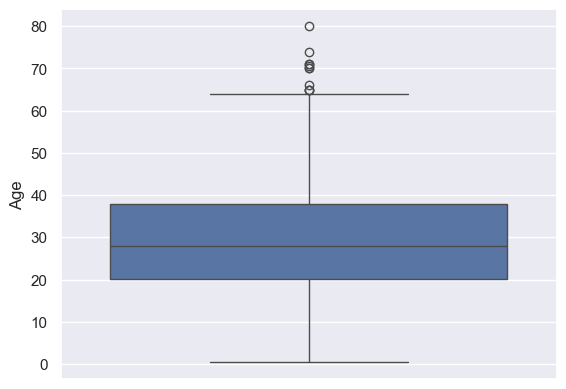

In [61]:
sns.boxplot(df['Age'])

<Axes: ylabel='Fare'>

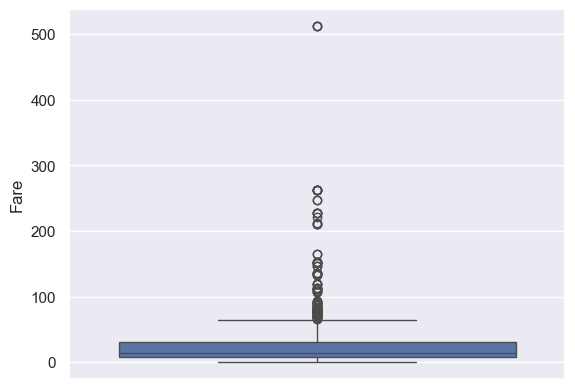

In [62]:
sns.boxplot(df['Fare'])

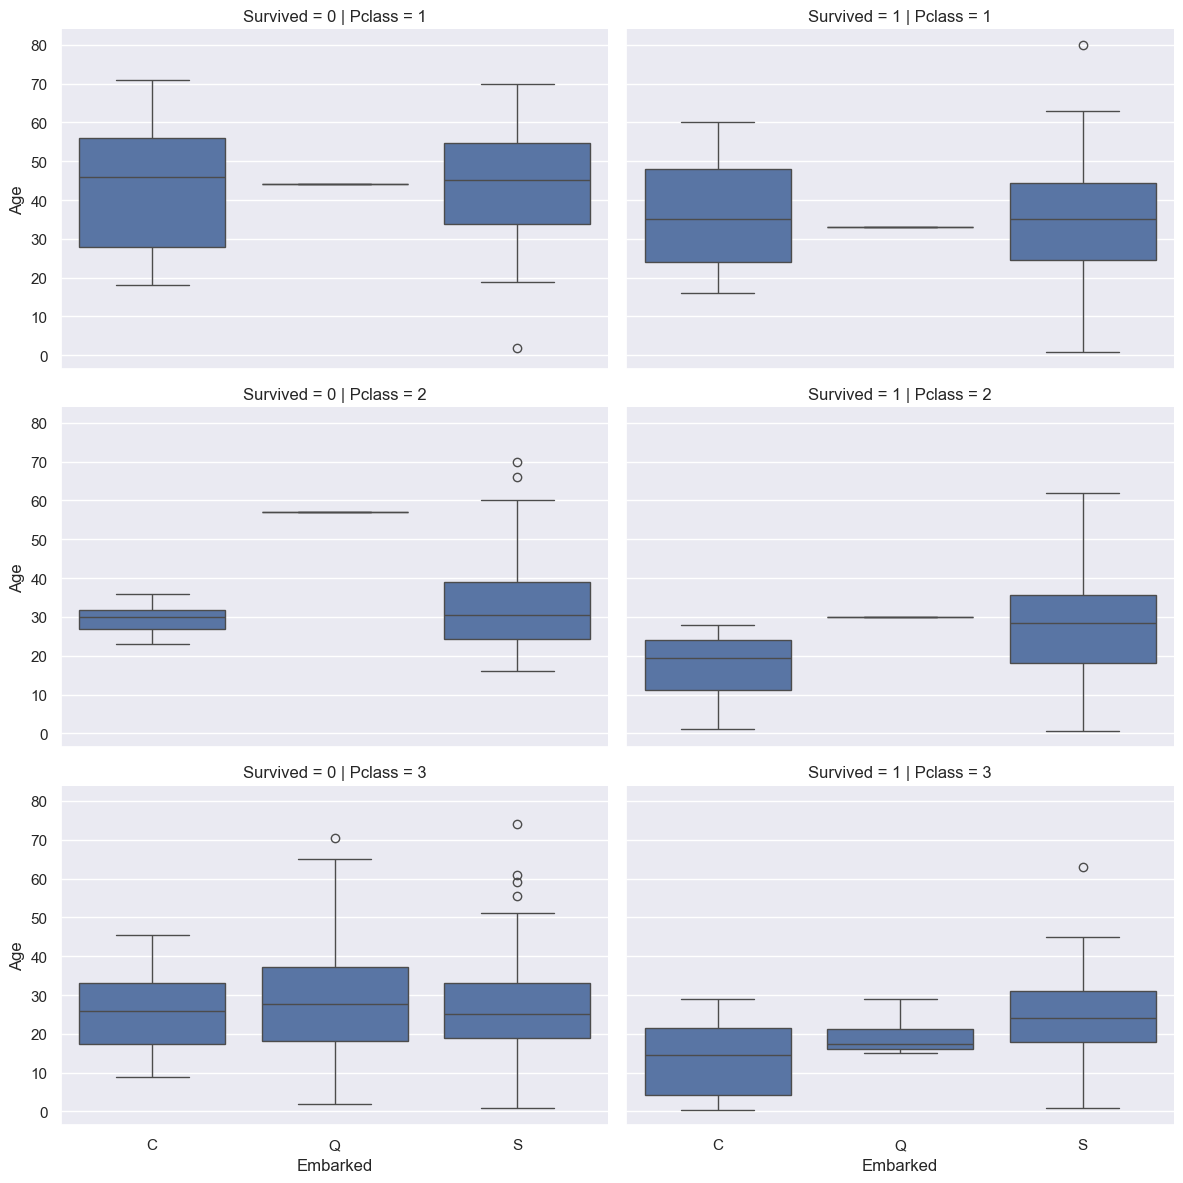

In [63]:
# Create a FacetGrid to visualize outliers in the 'Age' column by 'Survived' and 'Pclass'
g = sns.FacetGrid(df, col='Survived', row='Pclass', height=4, aspect=1.5)
g.map(sns.boxplot, 'Embarked', 'Age', order=['C', 'Q', 'S'])

# Add titles and labels
g.set_titles("Survived = {col_name} | Pclass = {row_name}")
g.set_axis_labels("Embarked", "Age")

plt.show()

3. DATA CLEANING

In [64]:
# Handle missing values

# Replace missing values in Age with the mean age
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Replace missing values in Embarked with the mode value
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# drop the Cabin column because it has many missing values
df.drop('Cabin', axis=1, inplace=True)

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: >

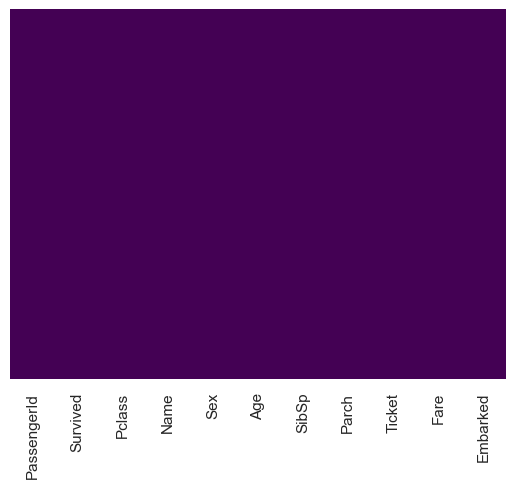

In [65]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: ylabel='Age'>

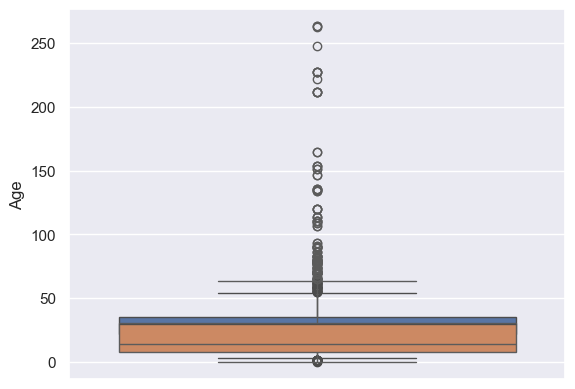

In [66]:
# Handle outliers
from sklearn.ensemble import IsolationForest

# Fit the model
iso_forest = IsolationForest(contamination=0.01)
df['Outlier'] = iso_forest.fit_predict(df[['Age','Fare']])

# Filter out the outliers
df_filtered = df[df['Outlier'] == 1]

# Plot the filtered data
sns.boxplot(df_filtered['Age'])
sns.boxplot(df_filtered['Fare'])

4. EXPLORATORY DATA ANALYSIS(EDA)

In [67]:
# Calculate descriptive statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Outlier
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.979798
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.200102
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,-1.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


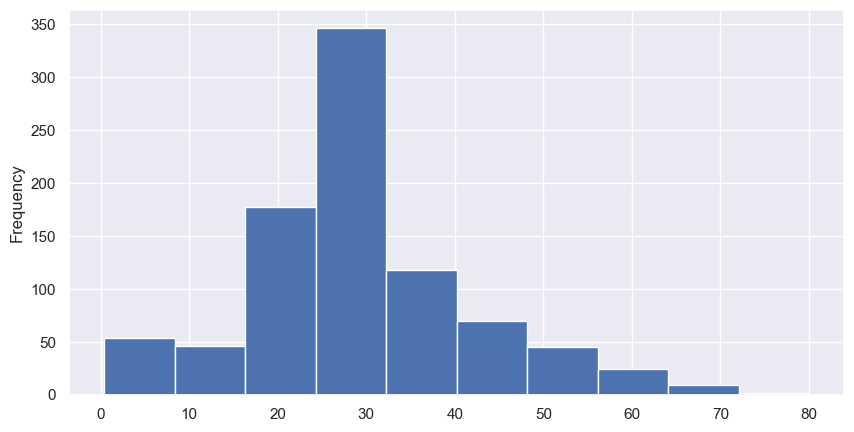

In [68]:
# Distribution of Age in the dataset
df['Age'].plot(kind='hist', figsize=(10,5))
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

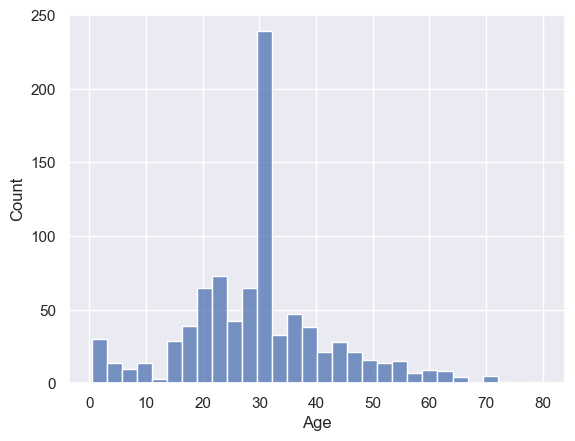

In [69]:
sns.histplot(df['Age']) 

<Axes: xlabel='Sex', ylabel='count'>

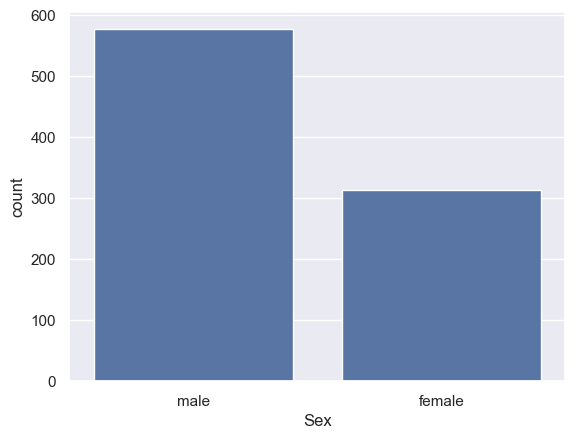

In [70]:
# Count plot for Sex
sns.countplot(x='Sex',data=df)

<Axes: xlabel='Survived', ylabel='count'>

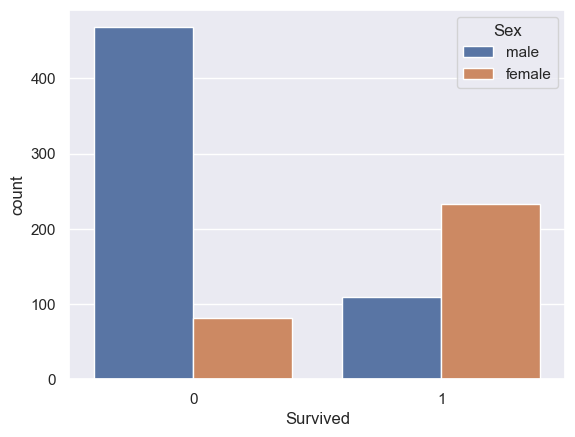

In [71]:
# Count plot for Survived and Sex
sns.countplot(x='Survived',hue='Sex',data=df)

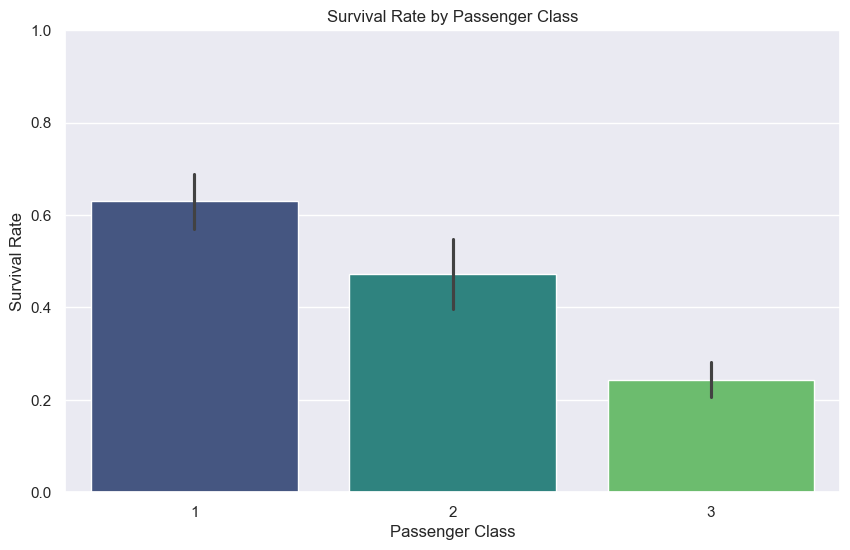

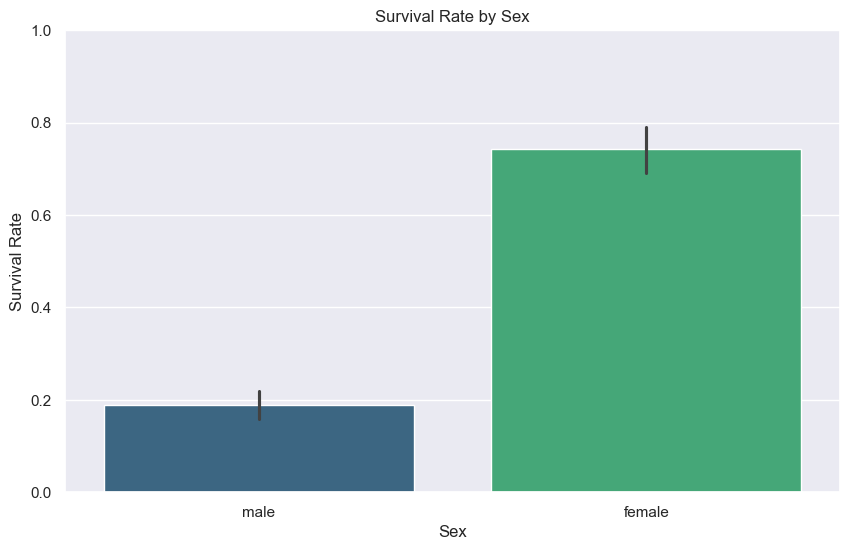

In [72]:
# Relationship between Survived and Pclass
# Bar plot for survival rate by passenger class
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=df, palette='viridis')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()

# Relationship between Survived and Sex
# Bar plot for survival rate by sex
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=df, palette='viridis')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

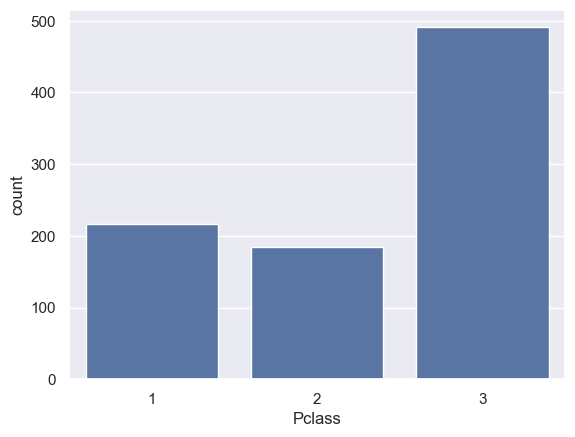

In [73]:
# Count plot for Pclass
sns.countplot(x='Pclass',data=df)

<Axes: xlabel='Survived', ylabel='count'>

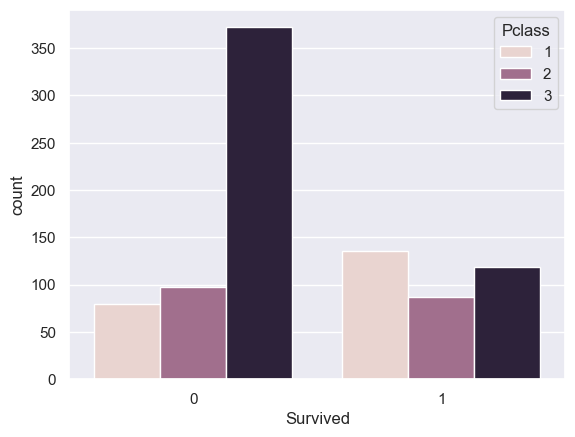

In [74]:
# Count plot for Survived and Pclass
sns.countplot(x='Survived',hue='Pclass',data=df)

<Axes: xlabel='Survived', ylabel='count'>

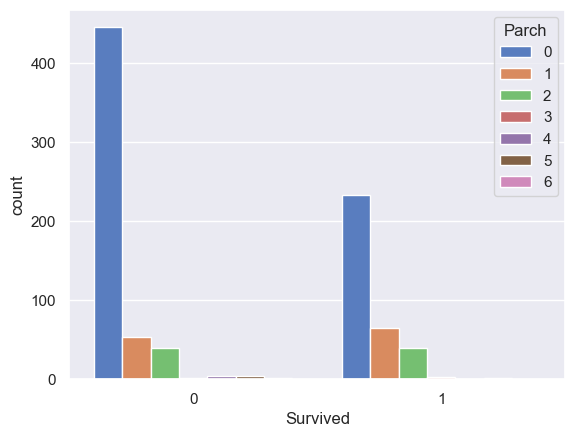

In [75]:
# Count plot for Survived and Parch
sns.countplot(x='Survived',hue='Parch',data=df, palette='muted')

<Axes: xlabel='Survived', ylabel='count'>

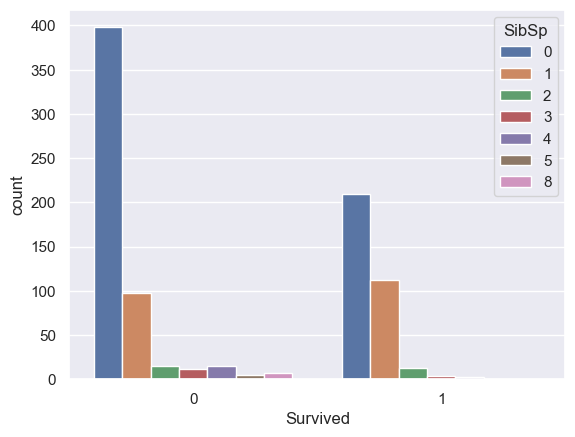

In [76]:
# Count plot for Survived and SibSp
sns.countplot(x='Survived',hue='SibSp',data=df, palette='deep')

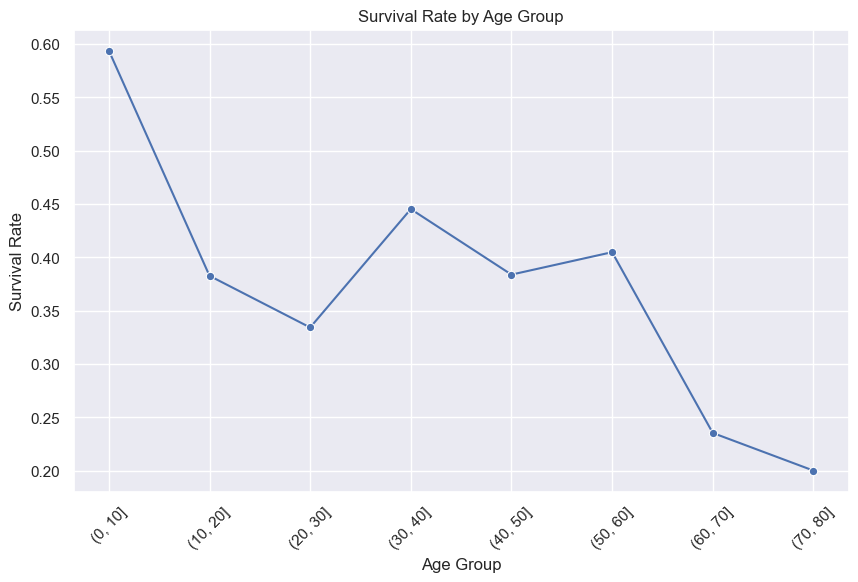

In [77]:
# Survival rate by age group    

# Create age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

# Calculate survival rate by age group
age_group_survival = df.groupby('AgeGroup')['Survived'].mean().reset_index()

# Convert AgeGroup to string type for plotting
age_group_survival['AgeGroup'] = age_group_survival['AgeGroup'].astype(str)

# Plot the survival rate by age group
plt.figure(figsize=(10, 6))
sns.lineplot(data=age_group_survival, x='AgeGroup', y='Survived', marker='o')
plt.xticks(rotation=45)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')

plt.show()

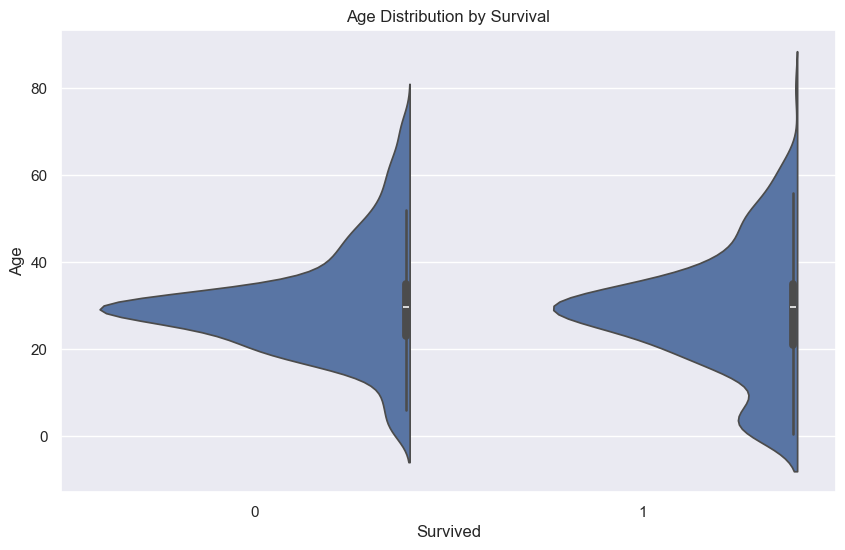

In [78]:
# Create a violin plot to show the distribution of ages for survivors and non-survivors
plt.figure(figsize=(10, 6))
sns.violinplot(x='Survived', y='Age', data=df, split=True)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')

plt.show()

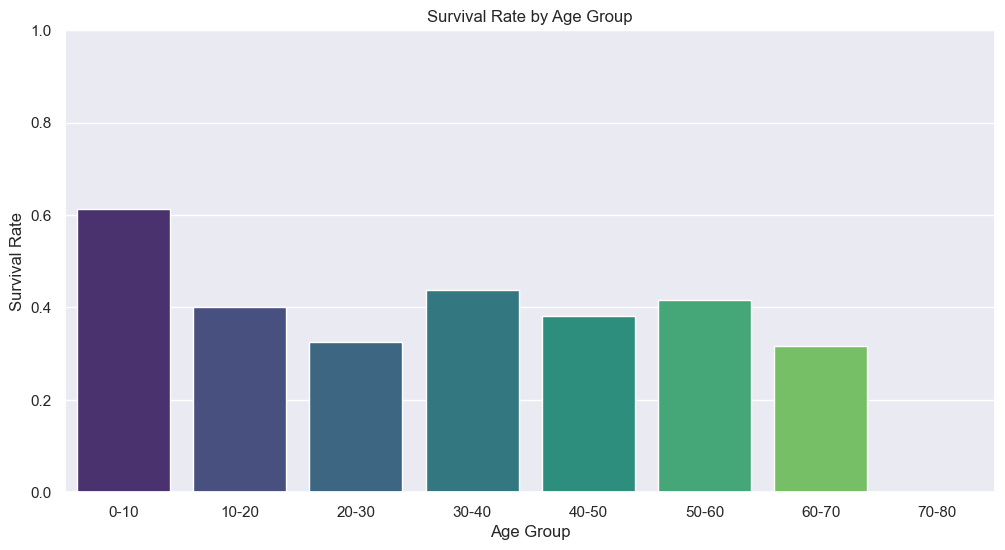

In [79]:
# Survival Rate by Age Group usung bar plot

# Create age groups
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate survival rate by age group
age_group_survival = df.groupby('AgeGroup')['Survived'].mean().reset_index()

# Plot the survival rate by age group
plt.figure(figsize=(12, 6))
sns.barplot(x='AgeGroup', y='Survived', data=age_group_survival, palette='viridis')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for better visualization

plt.show()

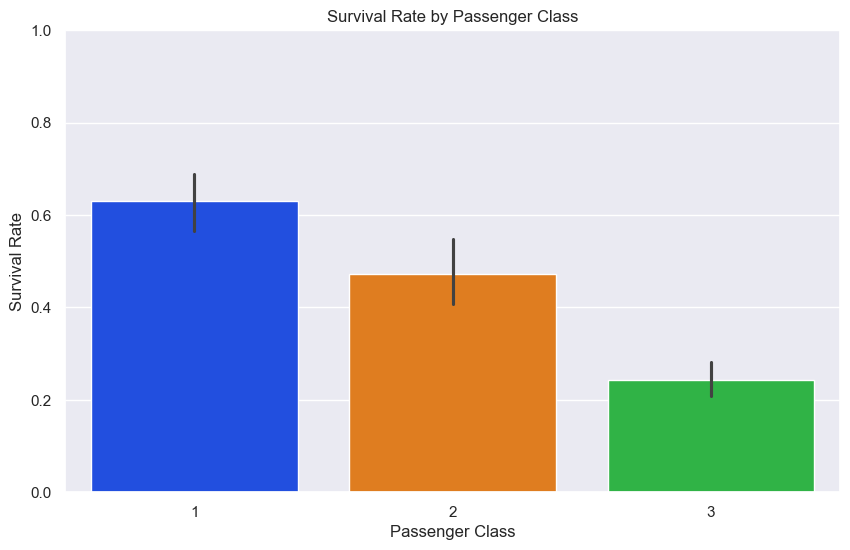

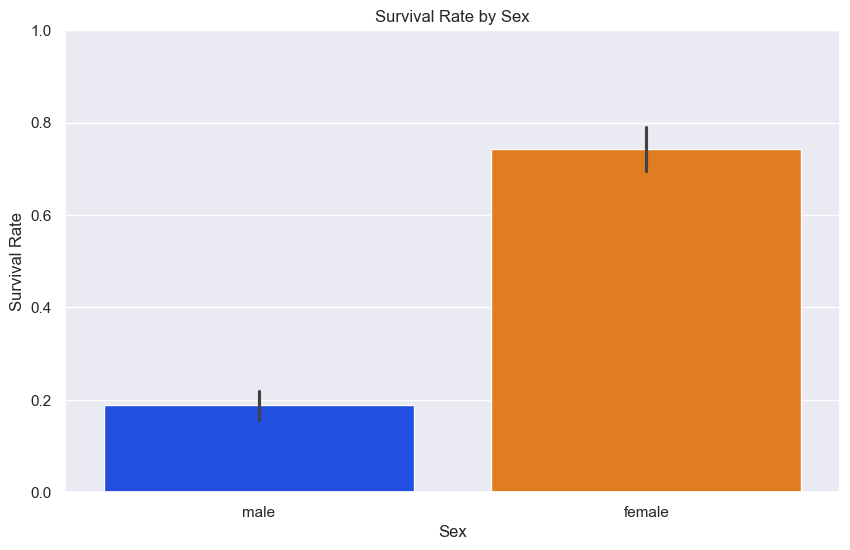

In [80]:
# Survival Rate by Passenger Class

# Bar plot for survival rate by passenger class
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=df, palette='bright')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()

# Bar plot for survival rate by sex
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=df, palette='bright')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()

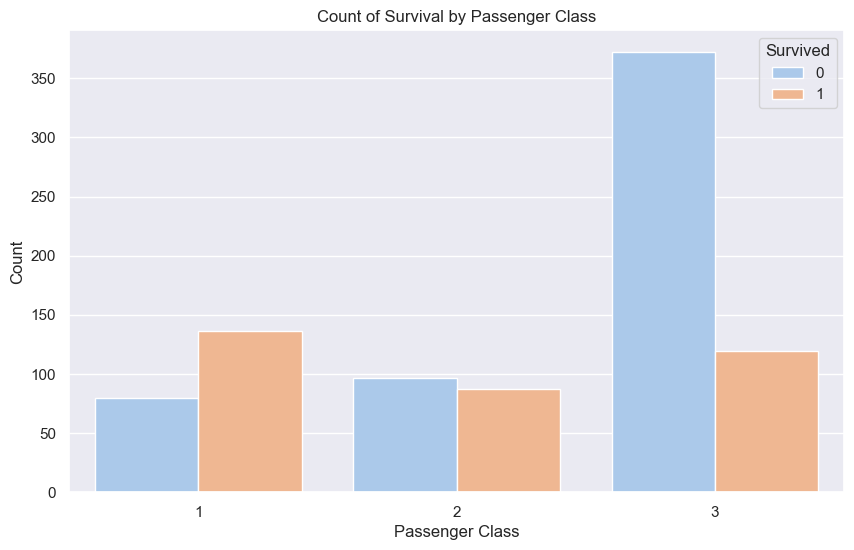

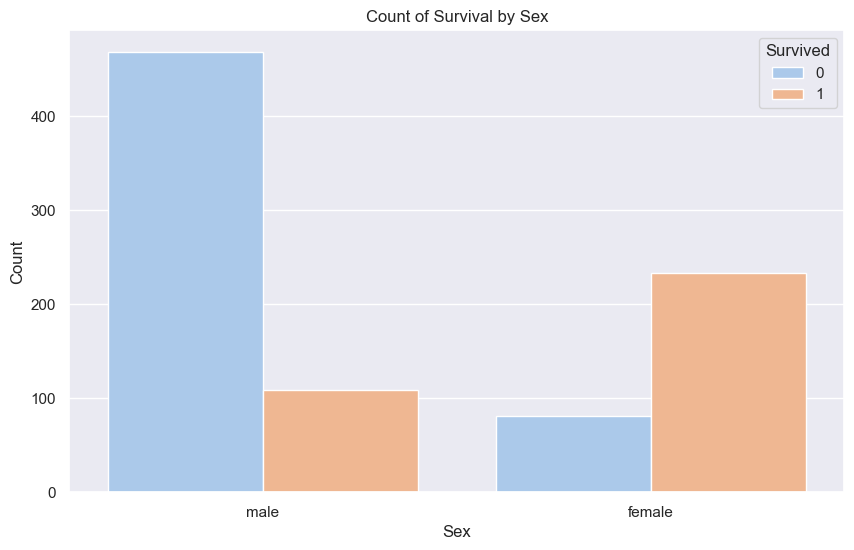

In [81]:
# Count plot for survival by passenger class
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='pastel')
plt.title('Count of Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

# Count plot for survival by sex
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=df, palette='pastel')
plt.title('Count of Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

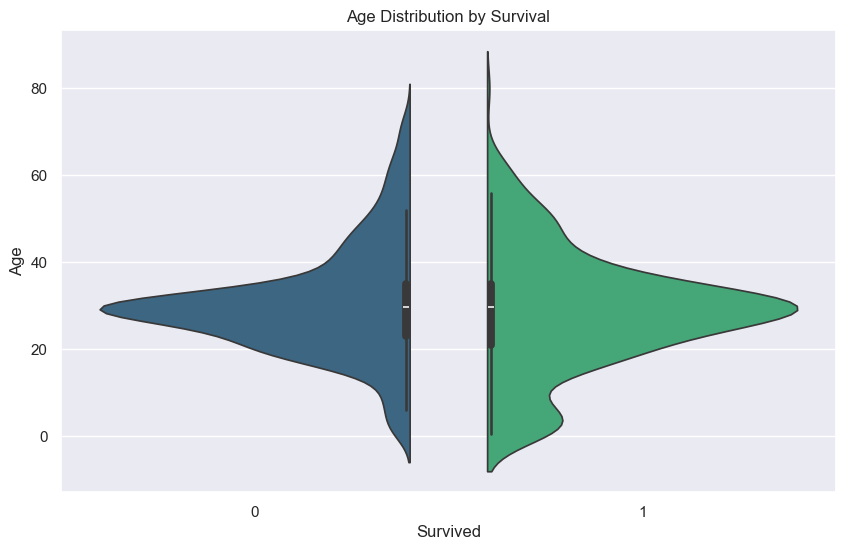

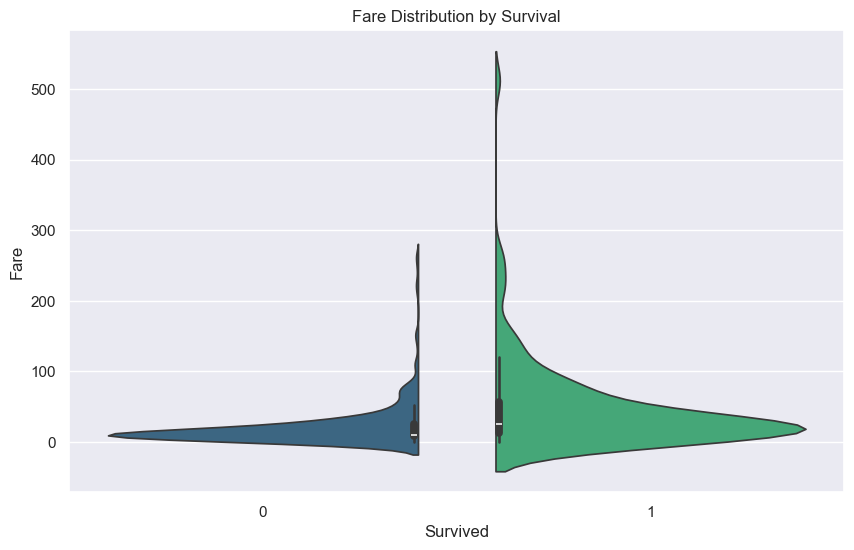

In [82]:
# Violin plot for age distribution by survival
plt.figure(figsize=(10, 6))
sns.violinplot(x='Survived', y='Age', data=df, palette='viridis', split=True)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

# Violin plot for fare distribution by survival
plt.figure(figsize=(10, 6))
sns.violinplot(x='Survived', y='Fare', data=df, palette='viridis', split=True)
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

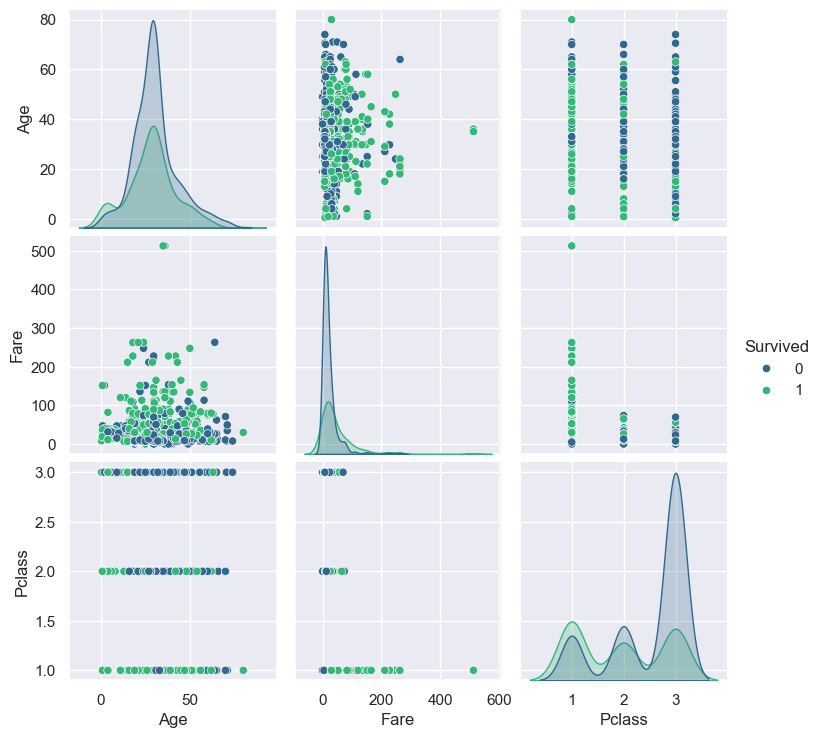

In [83]:
# Pair plot for numerical variables
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass']], hue='Survived', palette='viridis')
plt.show()

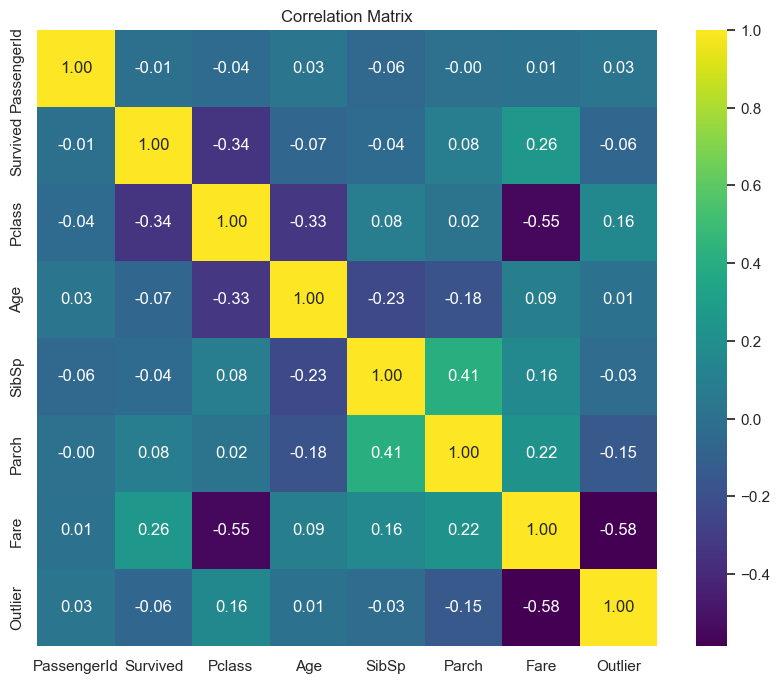

In [84]:
# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

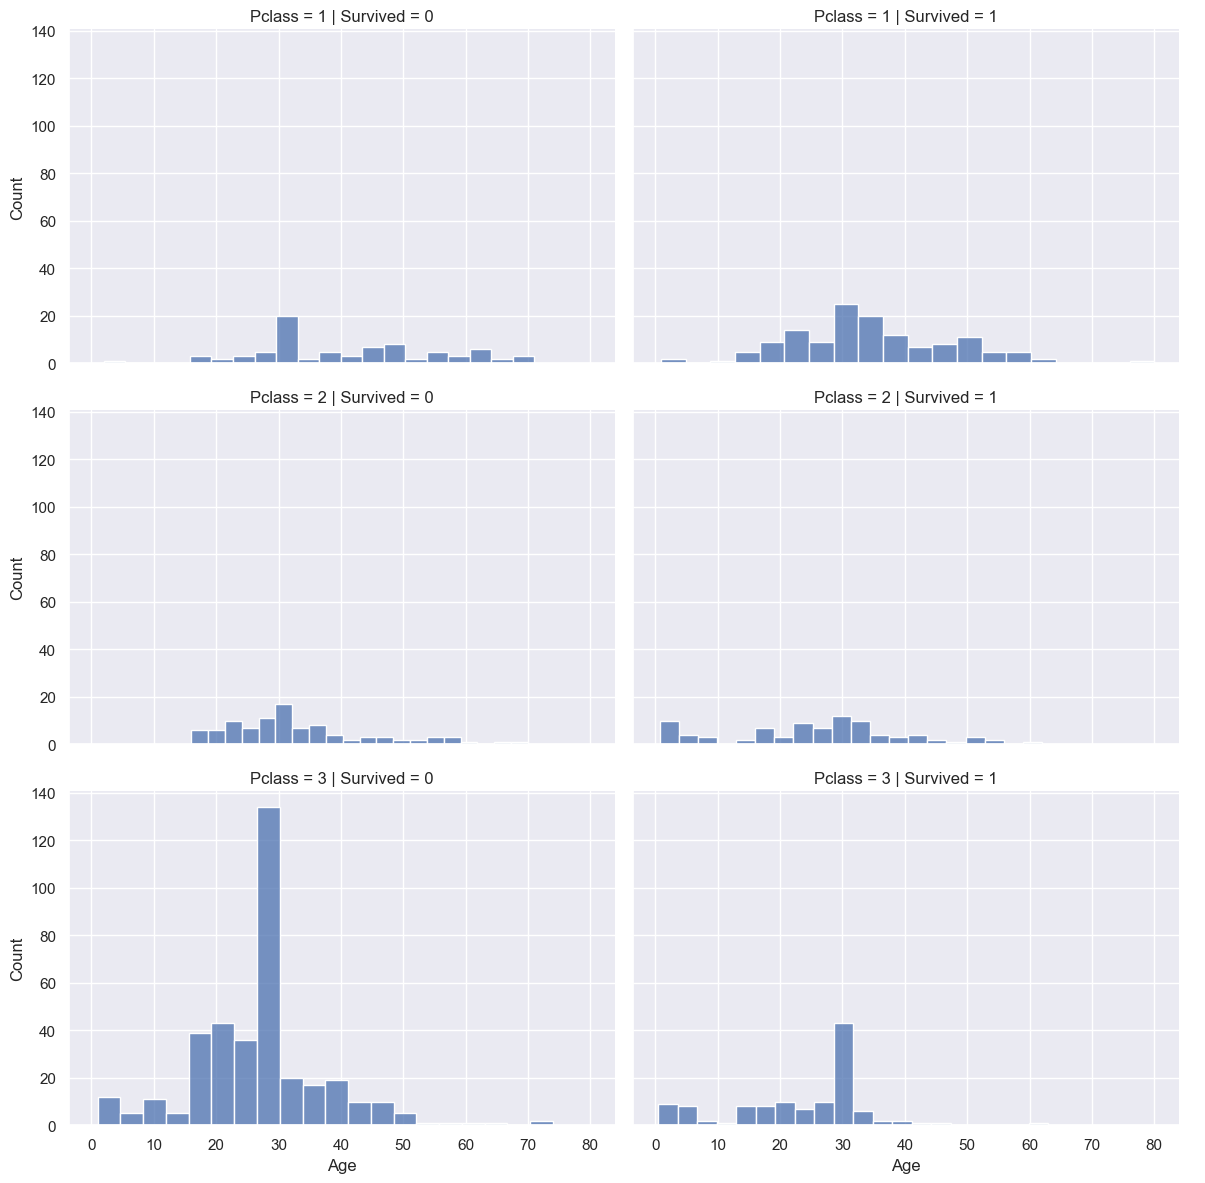

In [85]:
# FacetGrid for age distribution by survival and passenger class
sns.set(style='darkgrid')
g = sns.FacetGrid(df, col='Survived', row='Pclass', height=4, aspect=1.5)
g.map(sns.histplot, 'Age', bins=20, kde=False)
g.add_legend()
plt.show()

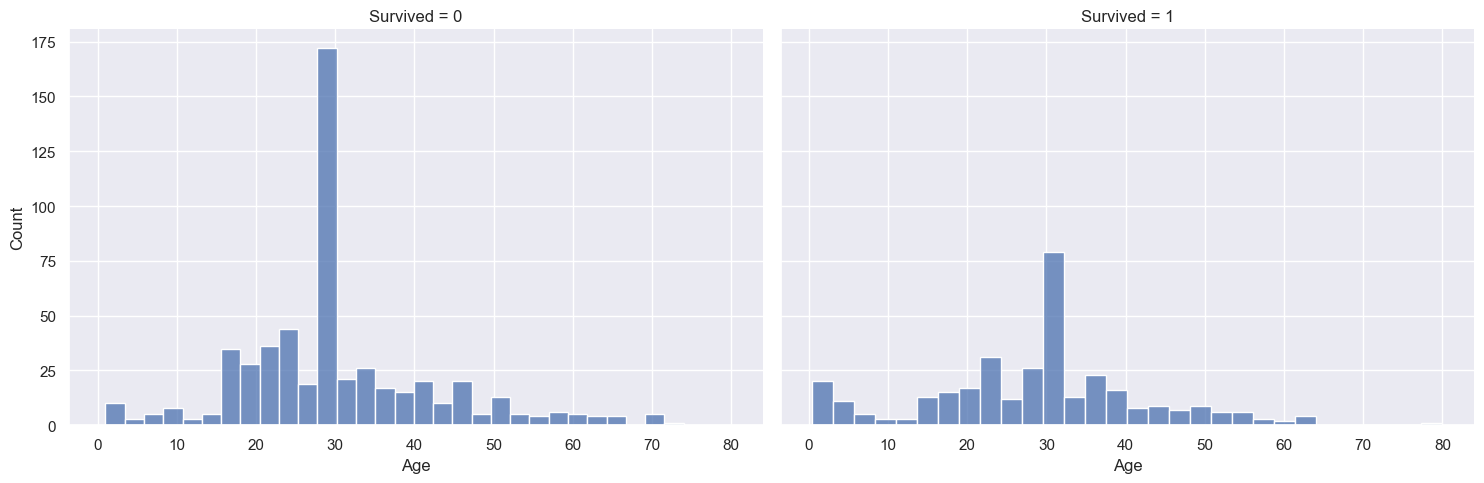

In [86]:
# Create a FacetGrid to plot the distribution of ages for survivors and non-survivors
g = sns.FacetGrid(df, col="Survived", height=5, aspect=1.5)
g.map(sns.histplot, "Age", bins=30, kde=False)

# Add titles
g.set_titles("Survived = {col_name}")
g.set_axis_labels("Age", "Count")

plt.show()

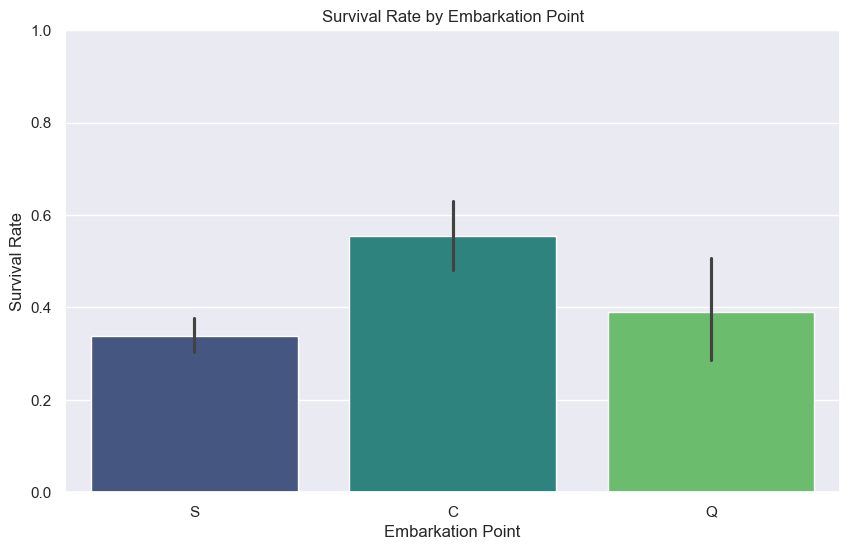

In [87]:
# Bar plot for survival rate by embarkation point
plt.figure(figsize=(10, 6))
sns.barplot(x='Embarked', y='Survived', data=df, palette='viridis')
plt.title('Survival Rate by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()

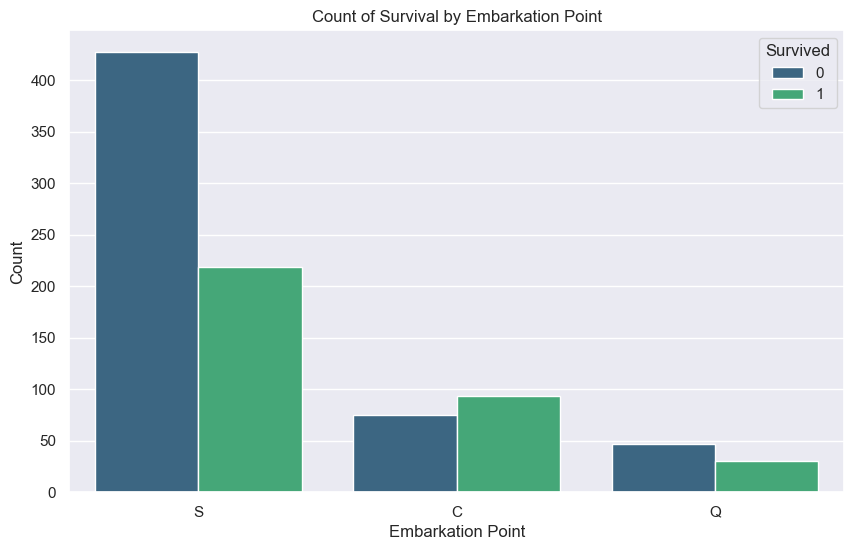

In [88]:
# Count plot for survival by embarkation point
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', hue='Survived', data=df, palette='viridis')
plt.title('Count of Survival by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Count')
plt.show()

Survived         0         1
Embarked                    
C         0.446429  0.553571
Q         0.610390  0.389610
S         0.660991  0.339009


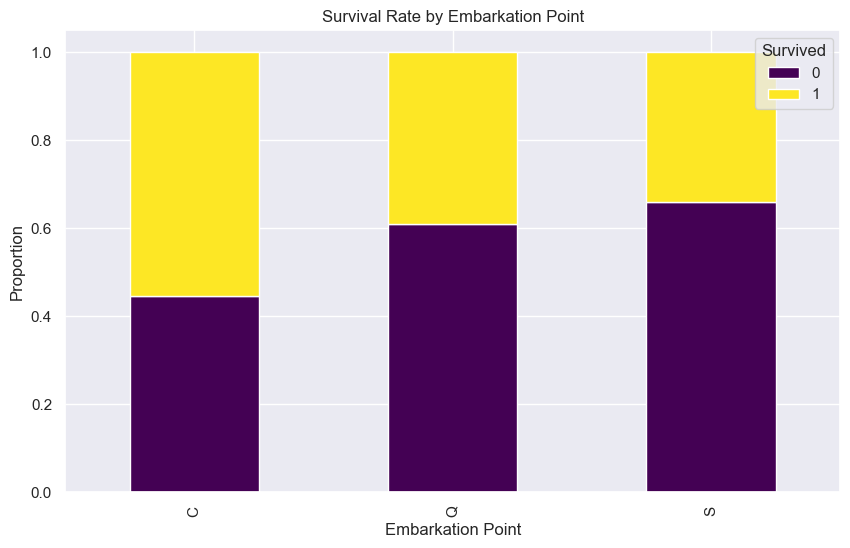

In [89]:
# Crosstab for survival by embarkation point
crosstab = pd.crosstab(df['Embarked'], df['Survived'], normalize='index')
print(crosstab)

# Plot the crosstab
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Survival Rate by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Proportion')
plt.legend(title='Survived', loc='upper right')
plt.show()

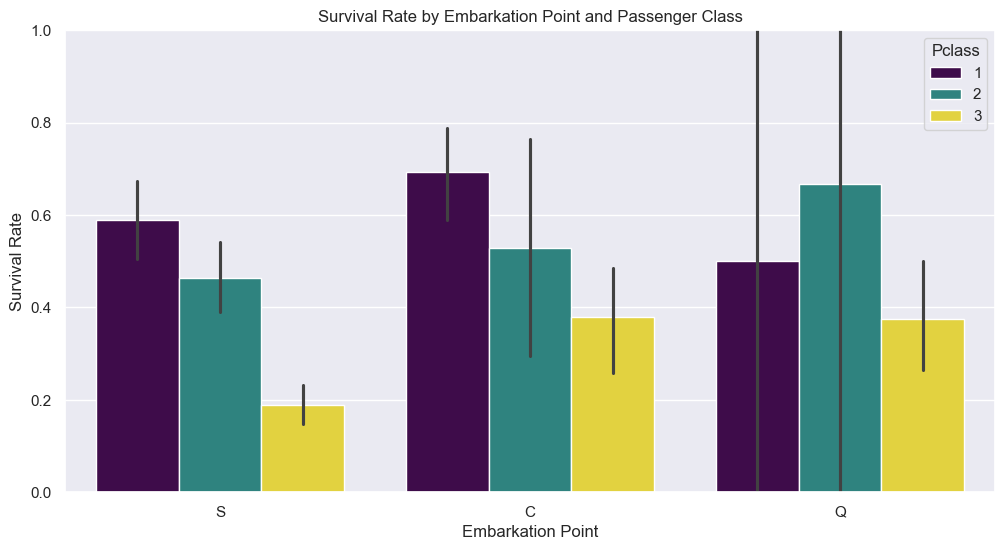

In [90]:
# Grouped bar plot for survival rate by embarkation point and passenger class
plt.figure(figsize=(12, 6))
sns.barplot(x='Embarked', y='Survived', hue='Pclass', data=df, palette='viridis')
plt.title('Survival Rate by Embarkation Point and Passenger Class')
plt.xlabel('Embarkation Point')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


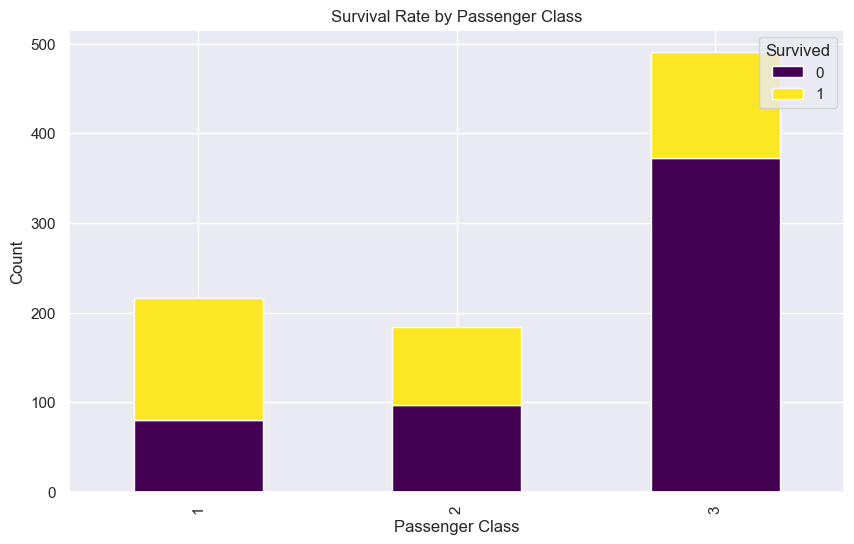

In [91]:
# Relationship between Pclass and survived
crosstab2=pd.crosstab(df['Pclass'], df['Survived'])
print(crosstab2)

# Plot the crosstab
pd.crosstab(df['Pclass'], df['Survived']).plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()